## Exercise-3

Wenfeng Zhu-Computer Vision and Deep Learning: Visual Synthesis

### Task-1: Analytical Gradients of the Cross-Entropy Loss

**The derivation of analytical gradient of the cross entropy loss**

There are three functions will be used in the derivation:

1. Cross entropy for single sample\
$$
\mathcal{L}^i = -log[\sigma(Wx^i)_{y^i}]
$$

2. Softmax function\
$$
\sigma\mathcal(z)_i = \frac {e^{z_i}}{\sum_j e^{z_j}}
$$
3. Kronecker-delta
$$
\delta_{mn}=
\begin{cases}
1, &m=n\\
0, &m \neq n
\end{cases}
$$

For the analytical gradient of the cross entropy loss:\
$$
\frac {\partial\mathcal{L}^i} {W_{l,k}} = \frac {\partial\mathcal{L}^i} {\partial p^i_l} * \frac {\partial p^i_l} {\partial s^i_l} * \frac {\partial s^i_l} {\partial W_{l,k}}
$$

Among them: \
$ p^i = \sigma{(s^i_l)} $ is the probability of $x^i$ after normalizing the score function by softmax\
$ s^i = Wx^i $ is the score function\
$ s^i_l$ is the score of a certain label

For the first item:\
$$
\mathcal{L}^i = -log(p^i_l)   ====>  \frac {\partial\mathcal{L}^i} {\partial p^i_l} = -\frac 1 {p^i_l} 
$$
For the second item,$p^i_l$ is:\
$$
p^i = \sigma(s^i) = \frac {e^{s^i_l}}{\sum e^{s^i}}
$$
Derive this equation: 
$$
\frac {\partial p^i} {\partial s^i_l} = \frac {\frac {\partial e^{s^i}} {\partial s^i_l}*\sum e^{s^i}-e^{s^i_l}*\frac {\partial \sum e^{s^i}} {\partial s^i_l}}{(\sum e^{s^i})^2}=
\begin{cases}
\frac {e^{s^i_l}}{\sum e^{s^i}}*(1-\frac {e^{s^i_l}}{\sum e^{s^i}}) = p^i_l*(1-p^i_l), &\mathcal l\text{ correspond to the real label}\\
\frac {e^{s^i_l}}{\sum e^{s^i}}*\frac {e^{s^i_m}}{\sum e^{s^i}}= p^i_l*(0-p^i_l), &\mathcal l\text{ don't correspond to the real label}
\end{cases}
$$
For the third item, about scores function, it's a linear function of the input, so we can get:\
$$
\frac {\partial s^{lk}} {\partial W_{l,k}} = x^i_k
$$

In summary:
$$
\frac {\partial\mathcal{L}^i} {W_{l,k}} = \frac {\partial\mathcal{L}^i} {\partial p^i_l} * \frac {\partial p^i_l} {\partial s^i_l} * \frac {\partial s^i_l} {\partial W_{l,k}} = x^i_k*(p^i_l-\delta_{ly^i}) = x^i_k*(\sigma(Wx^i)_l-\delta_{ly^i})
$$

### Task 2: Data Preparation and Visualization

1. **Import the necessary libraries**

In [1]:
import random
import matplotlib.pyplot as plt

from torchvision import datasets, transforms
import torch
import torch.nn as nn
import numpy as np
from tqdm.auto import tqdm  # Not needed but very cool!

The max of train dataset is:
 [[  0   0   0   0   0   0   0   0   0   0   0   0 116 254 216   9   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  16  47 157 254 255 254 255 255 255 255 255 255 255 255
  255 255 244 255 184 197   0   0   0   0]
 [  0   0  64  29 134  62 234 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 165   0   0]
 [  0   0 141 101  96 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 192 121   0]
 [  0  38 144 101 254 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 254 221  63]
 [  0   0  95 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255  93]
 [  0   7 210 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 254 253]
 [ 47 191 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 253]
 [191 252 255 255 255 255 255 255 

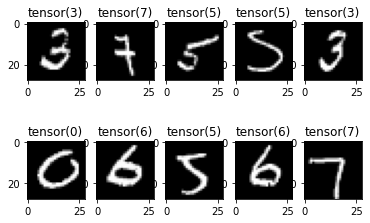

In [2]:
def load_data(train=True):
    mnist = datasets.MNIST('../data',
                           train=train,
                           download=True)
    return mnist


def plot_examples(data):
    #########################
    #### Your Code here  ####
    #########################
    # print(random.randint(0, 5996))
    train_numpy = data.data.numpy()
    # print(np.argmax(train_numpy, axis=0))
    print("The max of train dataset is:\n", train_numpy.max(axis=0))
    print("\nThe min of train dataset is:\n", train_numpy.min(axis=0))
    print("\nThe mean of train dataset is:\n", train_numpy.mean(axis=0))
    print("\nThe shape of train dataset is:\n", data.data.shape)
    print("\nThe dtype of train dataset is:\n", data.data.type())
    # Plot some examples and put their corresponding label on top as title.
    start = random.randint(0, 59989)
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(data.data[start + i].numpy(), cmap="gray")
        plt.title(data.targets[i+start])
    plt.show()
    
    
data = load_data()
# subtask 1
plot_examples(data)

2. **Convert all images into plain vectors and process them to be centered around 0 in the range of [-1, 1]. In the end you should have two arrays of images and labels**

In [3]:
def convert_mnist_to_vectors(data):
    '''Converts the ``[28, 28]`` MNIST images to vectors of size ``[28*28]``.
       It outputs mnist_vectors as a array with the shape of [N, 784], where
       N is the number of images in data.
    '''

    mnist_vectors = []
    labels = []

    #########################
    #### Your Code here  ####
    #########################
    # image--PIL.Image.Image; label--int
    for image, label in tqdm(data):
        mnist_vectors.append(np.asarray(image).ravel())
        labels.append(label)

    # return as numpy arrays
    mnist_vectors = np.asarray(mnist_vectors)
    mnist_vectors_center = (mnist_vectors - mnist_vectors.mean(axis=1)[:, None]) / (
            mnist_vectors.max(axis=1)[:, None] - mnist_vectors.min(axis=1)[:, None])
    labels = np.asarray(labels)

    return mnist_vectors_center, labels

3. **Now run the provided do_pca on the converted data in order to obtain a matrix of sorted eigenvectors that represent the principal components of the train set. Reshape the 10 most important principal components to the shape of [28, 28] in order to plot them as images.**

  0%|          | 0/60000 [00:00<?, ?it/s]

<class 'numpy.ndarray'> (784, 784)


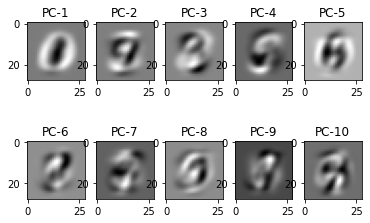

In [4]:
def do_pca(data):
    '''Returns matrix [784x784] whose columns are the sorted eigenvectors.
       Eigenvectors (prinicipal components) are sorted according to their
       eigenvalues in decreasing order.
    '''

    mnist_vectors, labels = convert_mnist_to_vectors(data)
    #     prepare_data(mnist_vectors)

    # compute covariance matrix of data with shape [784x784]
    cov = np.cov(mnist_vectors.T)
    # print("covariance matrix",cov[390])

    # compute eigenvalues and vectors
    eigVals, eigVec = np.linalg.eig(cov)

    # sort eigenVectors by eigenValues
    sorted_index = eigVals.argsort()[::-1]
    eigVals = eigVals[sorted_index]
    sorted_eigenVectors = eigVec[:, sorted_index]
    print(type(sorted_eigenVectors), sorted_eigenVectors.shape)
    sorted_eigenVectors_real = sorted_eigenVectors.real.astype(float).T
    return sorted_eigenVectors.real.astype(float).T


def plot_pcs(sorted_eigenVectors, num=10):
    '''Plots the first ``num`` eigenVectors as images.'''

    #########################
    #### Your Code here  ####
    #########################
    pc_10 = np.empty((10, 28, 28))
    for i in range(num):
        pc_10[i] = sorted_eigenVectors[i].reshape((28, 28))
        plt.subplot(2, 5, i + 1)
        plt.imshow(sorted_eigenVectors[i].reshape((28, 28)), cmap="gray")
        plt.title("PC-"+str(i+1))
    plt.show()    

# # subtask 3
pcs = do_pca(data)
#
# # subtask 3
plot_pcs(pcs)

3. **Explain what you are seeing. Can you make a statement regarding the difficulty of MNIST digit classification problem? What would you expect the principal components to look like, if the problem was easy?**

The ten most significant principal components derived from PCA are finally shown, and basically possess a distribution similar to the actual label classification.\
About MNIST digit classification problem. It is not difficult because the distribution of graphs corresponding to different label classes in most of training datas has significant differences, It makes the principal components obtained by PCA well summarized.\
I actually expected to see the principal components that could correspond to the actual labels being displayed. However, the meanings of the individual feature dimensions of the principal components of PCA are somewhat ambiguous and not as explanatory as the original sample features.

4. **Project the MNIST vectors of the train set onto the two most important principal components (associated with two largest eigenvalues). Use the dot product for the projection into the 2D feature space spanned by the two principal components and plot the resulting points in a scatter (use the scatter provided by matplotlib for this) plot. To get a better overview you can also choose a subset of the points. Color each dot corresponding to its class.**

  0%|          | 0/60000 [00:00<?, ?it/s]

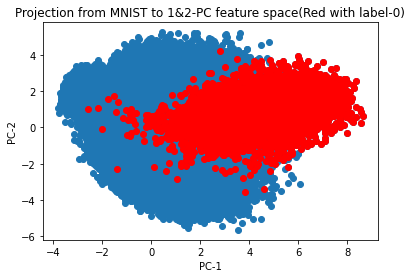

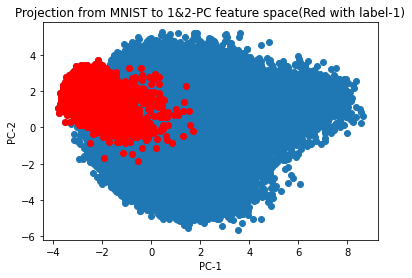

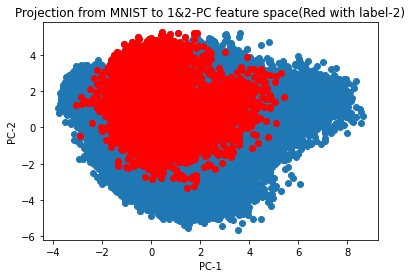

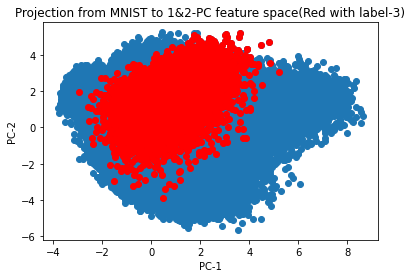

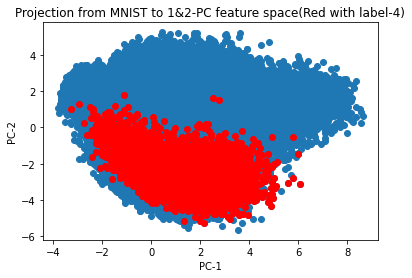

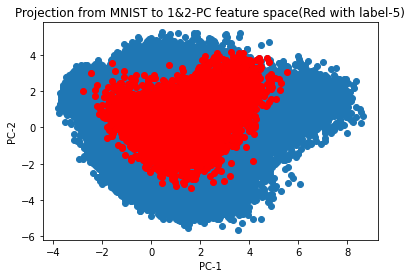

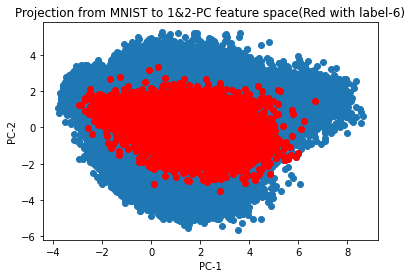

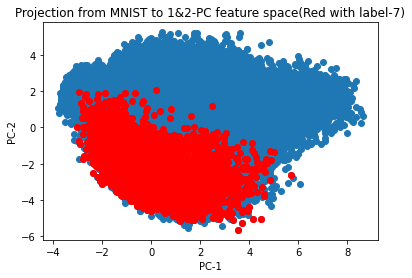

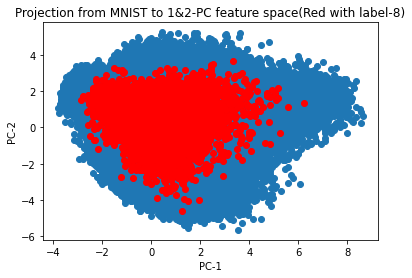

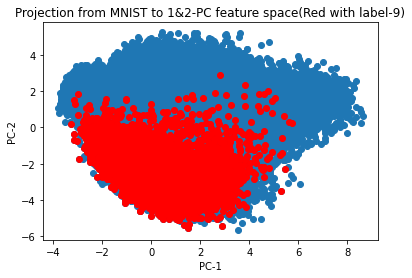

In [5]:
def plot_projection(sorted_eigenVectors, data):
    '''Projects ``data`` onto the first two ``sorted_eigenVectors`` and makes
    a scatterplot of the resulting points'''

    #########################
    #### Your Code here  ####
    #########################
    mnist_vectors, labels = convert_mnist_to_vectors(data)
    pc_1 = mnist_vectors @ sorted_eigenVectors[0]
    pc_2 = mnist_vectors @ sorted_eigenVectors[1]
    for i in range(10):
        indices = np.argwhere(labels == i).ravel()
        # print(indices.shape, pc_1.shape)
        plt.scatter(pc_1, pc_2)
        plt.scatter(pc_1[indices], pc_2[indices], color="red")
        plt.xlabel("PC-1")
        plt.ylabel("PC-2")
        plt.title("Projection from MNIST to 1&2-PC feature space(Red with label-" + str(i)+")")
        plt.show()

        
plot_projection(pcs, data)

4. **Interpret the plot. What can it tell us about the MNIST dataset? Can you make a statement regarding the difficulty of MNIST digit classification problem?**

The plots show the distribution of the MNIST dataset in PC-1&PC-2 feature space. The degree of dispersion reflects the interpretability of this feature space. And obviously, the feature space consisting of principal component 1 and principal component 2 is not good enough in terms of discrete separation for all labels. That is, this feature space loses a certain amount of information. Back to the MNIST classification problem, when applying the PCA method, the difficulty lies in selection of the number of dimensions for feature space, too many feature dimensions will cause an increase in computation and too few feature dimensions will cause a loss of information.

### Task 3: Defining, Training and Evaluating an MLP